## Objective
Determine if channel locations in raw binary files from https://buzsakilab.nyumc.org/datasets/SiegleJ need to be sorted or remain in format provided

## Imports

In [14]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from spikeinterface import load_extractor, BinaryRecordingExtractor

from src.sorters.kilosort import Kilosort
from src.comparison import Comparison

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup

In [10]:
SORTED_REC = load_extractor(
    "/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_760938797/session_778240327/probe_792607549/spike_band.si"
)  # type: BinaryRecordingExtractor
SORTED_KS = Kilosort(
    spikesort_matlab4_path="/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_760938797/session_778240327/probe_792607549/spikesort_chans_sorted",
    curation_level="first",
    recording=SORTED_REC,
    name="Sorted"
)

In [11]:
UNSORTED_REC = load_extractor(
    "/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_760938797/session_778240327/probe_792607549/spike_band_unsorted.si"
)  # type: BinaryRecordingExtractor
UNSORTED_KS = Kilosort(
    spikesort_matlab4_path="/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_760938797/session_778240327/probe_792607549/spikesort_chans_unsorted",
    curation_level="first",
    recording=UNSORTED_REC,
    name='Unsorted'
)

## Analysis

In [12]:
print("Num units")
print(f"Sorted: {len(SORTED_KS)}")
print(f"Unsorted: {len(UNSORTED_KS)}")

Num units
Sorted: 324
Unsorted: 303


Getting spike times
Getting match counts and agreement scores


100%|██████████| 324/324 [00:33<00:00,  9.78it/s]

Num Sorted: 324
Num Unsorted: 303
Num single matches: 182

For Sorted:
Num max matches: 186
Num unique max matches: 182

For Unsorted:
Num max matches: 191
Num unique max matches: 182


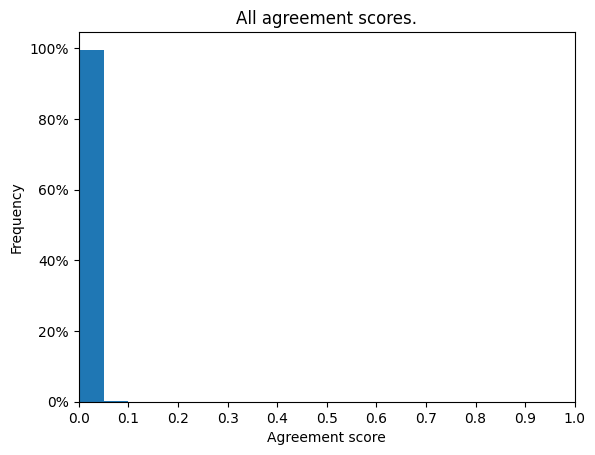

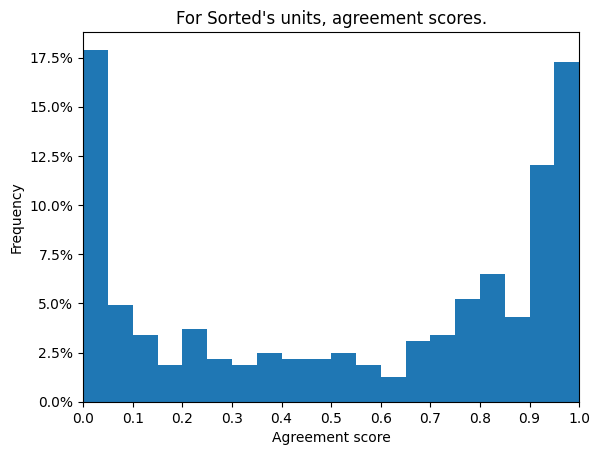

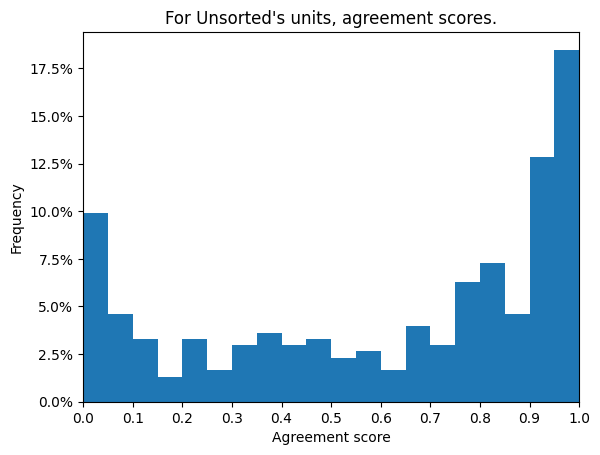

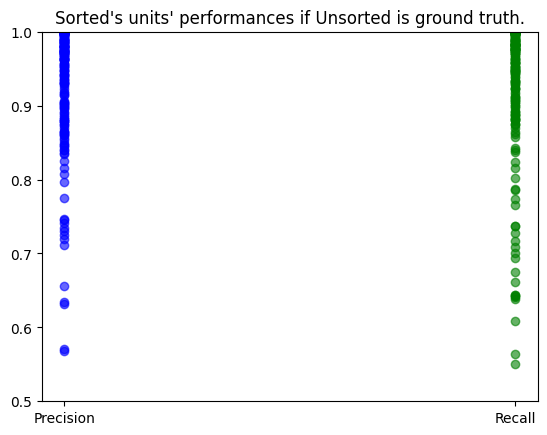

In [13]:
comp = Comparison(SORTED_KS, UNSORTED_KS, score_formula=1.5)

### Check waveforms for unsorted kilosort

In [19]:
# Find where there are large jumps in channel locations
for i, loc in enumerate(UNSORTED_REC.get_channel_locations()):
    print(f"{i}: {loc}")

0: [  59 2840]
1: [  43 2860]
2: [  59 2880]
3: [  27 2880]
4: [  11 2900]
5: [  27 2920]
6: [  11 2940]
7: [  27 2960]
8: [  43 2980]
9: [  59 3000]
10: [  43 3020]
11: [  59 3040]
12: [  43 3060]
13: [  11 3060]
14: [  27 3080]
15: [  11 3100]
16: [  27 3120]
17: [  43 3140]
18: [  59 3160]
19: [  43 3180]
20: [  59 3200]
21: [  43 3220]
22: [  11 3220]
23: [  27 3240]
24: [  11 3260]
25: [  27 3280]
26: [  11 3300]
27: [  59 3320]
28: [  43 3340]
29: [  59 3360]
30: [  43 3380]
31: [  11 3380]
32: [  27 3400]
33: [  11 3420]
34: [  27 3440]
35: [  11 3460]
36: [  59 3480]
37: [  43 3500]
38: [  59 3520]
39: [  43 3540]
40: [  59 3560]
41: [  27 3560]
42: [  11 3580]
43: [  27 3600]
44: [  11 3620]
45: [  59 3640]
46: [  43 3660]
47: [  59 3680]
48: [  43 3700]
49: [  59 3720]
50: [  27 3720]
51: [  11 3740]
52: [  27 3760]
53: [  11 3780]
54: [  27 3800]
55: [  43 3820]
56: [  59 3840]
57: [43 20]
58: [11 20]
59: [43 60]
60: [59 80]
61: [ 11 100]
62: [ 43 140]
63: [ 27 160]
64: [ 11

In [21]:
# Print unsorted ks units' max channel to find one near large jump
for i, unit in enumerate(UNSORTED_KS):
    print(f'{i}: {unit.chan}')

0: 0
1: 0
2: 2
3: 2
4: 4
5: 5
6: 9
7: 9
8: 10
9: 10
10: 11
11: 13
12: 14
13: 14
14: 16
15: 18
16: 21
17: 22
18: 25
19: 26
20: 26
21: 29
22: 33
23: 69
24: 71
25: 72
26: 71
27: 73
28: 72
29: 73
30: 77
31: 77
32: 78
33: 80
34: 81
35: 81
36: 82
37: 82
38: 83
39: 84
40: 85
41: 85
42: 85
43: 86
44: 82
45: 86
46: 87
47: 90
48: 90
49: 92
50: 93
51: 94
52: 95
53: 95
54: 95
55: 96
56: 97
57: 99
58: 99
59: 101
60: 102
61: 139
62: 141
63: 142
64: 143
65: 143
66: 145
67: 145
68: 144
69: 147
70: 148
71: 149
72: 150
73: 152
74: 153
75: 153
76: 153
77: 153
78: 154
79: 154
80: 156
81: 157
82: 157
83: 157
84: 154
85: 158
86: 158
87: 159
88: 160
89: 160
90: 161
91: 161
92: 163
93: 164
94: 167
95: 165
96: 165
97: 166
98: 166
99: 167
100: 167
101: 169
102: 169
103: 170
104: 170
105: 167
106: 171
107: 182
108: 185
109: 186
110: 189
111: 187
112: 189
113: 190
114: 191
115: 193
116: 194
117: 195
118: 198
119: 198
120: 200
121: 201
122: 202
123: 202
124: 206
125: 204
126: 204
127: 205
128: 205
129: 206
130: 20

In [48]:
UNIT = UNSORTED_KS[130] 

CHANNEL_IND = [UNIT.chan-1, UNIT.chan, UNIT.chan+1, UNIT.chan+2]
CHANNEL_IND += [55, 56]  # Include spatially close but indexically far channels
CHANNEL_IND += [345, 276]   # Include some random faraway channels


channel_locs = UNSORTED_REC.get_channel_locations()[CHANNEL_IND]
print(f"Unit chan: {UNIT.chan}")
print(f"Unit firing rate: {len(UNIT) / UNSORTED_REC.get_total_duration()} Hz")

print(f"\nSelected channel locations:")
for chan, loc in enumerate(channel_locs):
    print(f"{chan}: {loc}")

Unit chan: 207
Unit firing rate: 22.2 Hz

Selected channel locations:
0: [  11 3820]
1: [  27 3840]
2: [59 40]
3: [27 40]
4: [  43 3820]
5: [  59 3840]
6: [  27 2200]
7: [  59 1120]


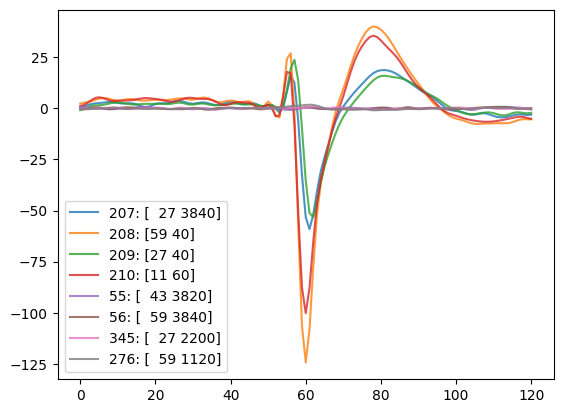

In [47]:
template = UNIT.get_template_mean()[CHANNEL_IND]
for chan, temp, loc in zip(CHANNEL_IND, template, channel_locs):
    plt.plot(temp, label=f"{chan}: {loc}", alpha=0.8)
plt.legend()
plt.show()

## Conclusion

Channels with cloes indices (206, 207, 208, and 209) but far locations have very similar waveforms while channels with close locations but far locations (55 and 56) have different waveforms.

Therefore, channels should be sorted. 

### Do it again for sorted kilosort?

In [29]:
for i, loc in enumerate(SORTED_REC.get_channel_locations()):
    print(f"{i}: {loc}")

0: [43 20]
1: [11 20]
2: [59 40]
3: [27 40]
4: [43 60]
5: [11 60]
6: [59 80]
7: [27 80]
8: [ 43 100]
9: [ 11 100]
10: [ 59 120]
11: [ 27 120]
12: [ 43 140]
13: [ 11 140]
14: [ 59 160]
15: [ 27 160]
16: [ 43 180]
17: [ 11 180]
18: [ 59 200]
19: [ 27 200]
20: [ 43 220]
21: [ 11 220]
22: [ 59 240]
23: [ 27 240]
24: [ 43 260]
25: [ 11 260]
26: [ 59 280]
27: [ 27 280]
28: [ 43 300]
29: [ 11 300]
30: [ 59 320]
31: [ 27 320]
32: [ 43 340]
33: [ 11 340]
34: [ 59 360]
35: [ 27 360]
36: [ 43 380]
37: [ 11 380]
38: [ 59 400]
39: [ 27 400]
40: [ 43 420]
41: [ 11 420]
42: [ 59 440]
43: [ 27 440]
44: [ 43 460]
45: [ 11 460]
46: [ 59 480]
47: [ 27 480]
48: [ 43 500]
49: [ 11 500]
50: [ 59 520]
51: [ 27 520]
52: [ 43 540]
53: [ 11 540]
54: [ 59 560]
55: [ 27 560]
56: [ 43 580]
57: [ 11 580]
58: [ 59 600]
59: [ 27 600]
60: [ 43 620]
61: [ 11 620]
62: [ 59 640]
63: [ 27 640]
64: [ 43 660]
65: [ 11 660]
66: [ 59 680]
67: [ 27 680]
68: [ 43 700]
69: [ 11 700]
70: [ 59 720]
71: [ 27 720]
72: [ 43 740]
73: 

In [30]:
# Print unsorted ks units' max channel to find one near large jump
for i, unit in enumerate(SORTED_KS):
    print(f'{i}: {unit.chan}')

0: 0
1: 0
2: 1
3: 2
4: 2
5: 6
6: 5
7: 6
8: 6
9: 7
10: 9
11: 10
12: 14
13: 10
14: 10
15: 10
16: 9
17: 11
18: 13
19: 14
20: 16
21: 18
22: 18
23: 21
24: 22
25: 22
26: 26
27: 26
28: 26
29: 29
30: 30
31: 30
32: 33
33: 69
34: 72
35: 71
36: 72
37: 73
38: 76
39: 77
40: 77
41: 77
42: 78
43: 78
44: 78
45: 80
46: 81
47: 81
48: 82
49: 83
50: 84
51: 84
52: 85
53: 85
54: 86
55: 86
56: 86
57: 86
58: 89
59: 89
60: 90
61: 92
62: 93
63: 94
64: 96
65: 95
66: 96
67: 97
68: 99
69: 99
70: 101
71: 102
72: 130
73: 146
74: 139
75: 139
76: 140
77: 141
78: 141
79: 142
80: 143
81: 142
82: 145
83: 145
84: 145
85: 144
86: 147
87: 148
88: 148
89: 149
90: 149
91: 150
92: 158
93: 152
94: 153
95: 153
96: 153
97: 149
98: 154
99: 146
100: 154
101: 154
102: 155
103: 161
104: 156
105: 157
106: 157
107: 157
108: 158
109: 158
110: 158
111: 159
112: 161
113: 162
114: 162
115: 162
116: 162
117: 165
118: 163
119: 164
120: 165
121: 165
122: 165
123: 166
124: 166
125: 167
126: 167
127: 167
128: 168
129: 165
130: 169
131: 170
132:

In [31]:
UNIT = SORTED_KS[3]
print(UNIT.chan)
CHANNEL_IND = [UNIT.chan-1, UNIT.chan, UNIT.chan+1, UNIT.chan+2]
channel_locs = SORTED_REC.get_channel_locations()[CHANNEL_IND]
print(channel_locs)

2
[[11 20]
 [59 40]
 [27 40]
 [43 60]]


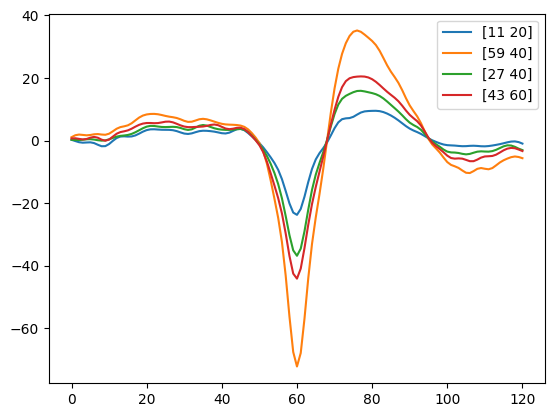

In [32]:
template = UNIT.get_template_mean()[CHANNEL_IND]
for temp, loc in zip(template, channel_locs):
    plt.plot(temp, label=loc)
plt.legend()
plt.show()